In [1]:
import zeus21
from matplotlib import pyplot as plt
import numpy as np
import scipy
from scipy.interpolate import interp1d,InterpolatedUnivariateSpline
from matplotlib.gridspec import GridSpec
import matplotlib.lines as mlines
#set up the CLASS cosmology
from classy import Class
ClassCosmo = Class()
ClassCosmo.compute()

import hmf
from hmf import MassFunction, Transfer   

import sys
sys.path.append('../21cm_ETHOS/21cmFAST-ethos-analysis-main/')
import sheth_tormen as st

from astropy.cosmology import FlatLambdaCDM
from astropy.cosmology import Planck15 as P15
from astropy import constants as const
import astropy.units as u

In [2]:
#Cosmology

omega_cdm = 0.12#0.1411027587
CosmoParams_input = zeus21.Cosmo_Parameters_Input(omegac = omega_cdm)
ClassyCosmo = zeus21.runclass(CosmoParams_input)
parcos = zeus21.Cosmo_Parameters(CosmoParams_input,ClassyCosmo)
corrf = zeus21.Correlations(parcos,ClassyCosmo)
 #hmfint = zeus21.HMF_interpolator(parcos,ClassyCosmo)

#Astrophysics

eps_star = 0.15
parastro = zeus21.Astro_Parameters(parcos, epsstar=eps_star)

#Temperature

#T21_coeff = zeus21.get_T21_coefficients(parcos, ClassyCosmo, parastro, hmfint, zmin=12) 

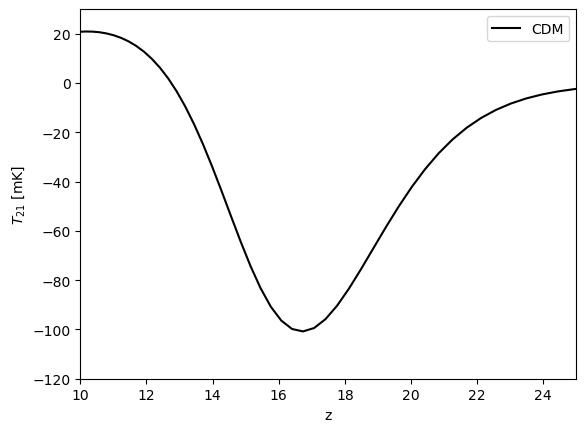

In [27]:
hmfint_CDM= zeus21.HMF_interpolator(parcos,ClassyCosmo)

T21_coeff_CDM = zeus21.get_T21_coefficients(parcos, ClassyCosmo, parastro, hmfint_CDM, zmin=8)
powerspec21_CDM = zeus21.Power_Spectra(parcos, ClassCosmo, corrf, T21_coeff_CDM, RSD_MODE=1)
zlist = T21_coeff_CDM.zintegral

fig3, ax3 = plt.subplots()

ax3.plot(zlist,T21_coeff_CDM.T21avg, 'k',label='CDM')

plt.xlabel(r'z');
plt.ylabel(r'$T_{21}$ [mK]');
plt.xlim([10, 25])
plt.ylim([-120, 30])
ax3.legend()


In [4]:
hmfint_CDM= zeus21.HMF_interpolator(parcos,ClassyCosmo)

In [5]:
np.mean(hmfint_CDM.sigmaMhtab/hmfint_CDM.sigmaMtab)

0.017391875786463288

In [6]:

eth_bohr = zeus21.ETHOS(parcos, ClassyCosmo, cosmo=P15, use_hmf=False, window_function = 'Bohr', f_params='Schneider18')
#eth = zeus21.ETHOS(parcos, ClassyCosmo, corrf, cosmo=P15, logk=False, window_function = 'TopHat' ,f_params='ST')
Mhmin = 1e5
Mhmax = 1e14
NMhs = 100
MM = np.logspace(np.log10(Mhmin),np.log10(Mhmax),NMhs)

In [7]:
hmf_P15   = st.HMF(cosmo=P15, use_hmf=False,window_function = 'Bohr', f_params='Schneider18')

Om0=0.3075, Odm0=0.2589, h=0.6774, rho_mean=8.534251e+10
Using Bohr window function
Using Schneider18 f(sigma) params


In [8]:
eth_zeus= zeus21.HMF_interpolator(parcos, ClassyCosmo,LCDM=False)

In [9]:
eth_zeus= zeus21.HMF_interpolator(parcos, ClassyCosmo,LCDM=False, h_peak=0.4, k_peak=100)

In [10]:
eth_zeus.sigmatab[13]

array([1.52182113, 1.39347916, 1.28497325, 1.19206519, 1.11163519,
       1.04133864, 0.97938086, 0.92436568, 0.87519108, 0.8309759 ,
       0.79100731, 0.75470256, 0.72158065, 0.69124112, 0.6633479 ,
       0.63761686, 0.61380621, 0.59170885, 0.57114642, 0.55196445,
       0.53402853, 0.51722113, 0.50143903, 0.48659123, 0.47259718,
       0.45938534, 0.44689192, 0.43505989, 0.42383811, 0.41318056,
       0.40304574, 0.39339613, 0.38419769, 0.37541953, 0.36703347,
       0.35901384, 0.35133712, 0.34398179, 0.33692809, 0.33015783,
       0.32365427, 0.31740196, 0.31138661, 0.30559501, 0.3000149 ,
       0.2946349 , 0.28944444, 0.28443369, 0.27959346, 0.27491519,
       0.2703909 , 0.2660131 , 0.2617748 , 0.25766942, 0.25369082,
       0.24983321, 0.24609116, 0.24245954, 0.23893355, 0.23550864,
       0.23218052, 0.22894516, 0.22579872, 0.22273758, 0.21975834,
       0.21685774, 0.21403271, 0.21128033, 0.20859785, 0.20598262,
       0.20343216, 0.20094408, 0.19851612, 0.19614614, 0.19383

In [11]:
eth_zeus.sigmaMhtab[:,13]

array([1.08149542, 1.07003601, 1.05850766, 1.04690824, 1.03522465,
       1.02344698, 1.01157966, 0.99964295, 0.98766302, 0.97565781,
       0.96363133, 0.9515822 , 0.93951634, 0.92744715, 0.91538362,
       0.9033272 , 0.89128201, 0.87925595, 0.86725233, 0.85527389,
       0.84332569, 0.83140992, 0.81952988, 0.8076881 , 0.79588698,
       0.78412868, 0.77241527, 0.76074854, 0.74913022, 0.7375619 ,
       0.72604507, 0.71458113, 0.70317138, 0.69181708, 0.68051943,
       0.66927957, 0.65809862, 0.64697765, 0.63591771, 0.62491982,
       0.613985  , 0.60311423, 0.59230852, 0.58156883, 0.57089615,
       0.56029145, 0.54975571, 0.53928991, 0.52889502, 0.51857205,
       0.50832198, 0.49814582, 0.48804459, 0.47801929, 0.46807097,
       0.45820066, 0.44840941, 0.4386983 , 0.42906839, 0.41952078,
       0.41005656, 0.40067686, 0.39138279, 0.38217549, 0.37305612,
       0.36402583, 0.35508582, 0.34623724, 0.33748132, 0.32881926,
       0.32025226, 0.31178158, 0.30340842, 0.29513406, 0.28695

In [12]:
eth_zeus.sigmatab[:,13]

array([0.69490464, 0.6948523 , 0.69478565, 0.694701  , 0.69459377,
       0.69445841, 0.69428815, 0.69407496, 0.69380926, 0.6934799 ,
       0.69307396, 0.69257674, 0.69197179, 0.69124112, 0.69036568,
       0.6893263 , 0.68810518, 0.68668818, 0.68506757, 0.68324504,
       0.68123398, 0.67906   , 0.67675887, 0.67437147, 0.67193627,
       0.66948081, 0.66701424, 0.66452258, 0.66196802, 0.65929204,
       0.65642179, 0.65327798, 0.64978303, 0.6458681 , 0.64147846,
       0.6365767 , 0.63114403, 0.62517967, 0.61869905, 0.61173099,
       0.60431445, 0.59649515, 0.58832247, 0.57984674, 0.57111707,
       0.56217973, 0.55307718, 0.54384742, 0.53452383, 0.52513525,
       0.51570627, 0.50625761, 0.49680657, 0.4873675 , 0.47795223,
       0.4685705 , 0.45923033, 0.44993831, 0.44069985, 0.43151947,
       0.42240092, 0.41334736, 0.40436147, 0.39544557, 0.38660166,
       0.37783152, 0.36913674, 0.36051877, 0.35197895, 0.34351851,
       0.33513863, 0.32684042, 0.31862497, 0.31049335, 0.30244

In [13]:

sigma_eth = np.sqrt(eth_bohr.sigma2_M(MM, LCDM=False, h_peak=0.4, k_peak=100.,))
dsigma2_eth =(eth_bohr.dsigma2_dM(MM, LCDM=False, h_peak=0.4, k_peak=100.,)) 
sigma_12_eth= sigma_eth*eth_bohr.growth_fac(12)
sigma_10_eth = sigma_eth*eth_bohr.growth_fac(10)
dsigma2_12_eth = dsigma2_eth*eth_bohr.growth_fac(12)
dsigma2_10_eth = dsigma2_eth*eth_bohr.growth_fac(10)
dsigmadM_12_eth = dsigma2_eth*eth_bohr.growth_fac(12)/2/sigma_eth
dsigmadM_10_eth = dsigma2_eth*eth_bohr.growth_fac(10)/2/sigma_eth
dsigmadM_eth = dsigma2_eth/2/sigma_eth

Text(0, 0.5, '$\\sigma$')

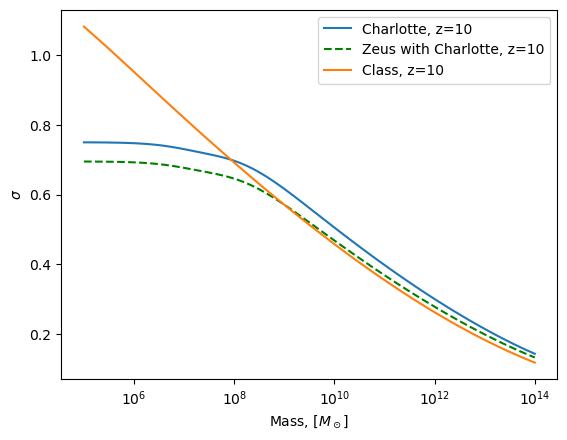

In [14]:
fig, ax = plt.subplots()


ax.plot(MM,sigma_10_eth,'-',label='Charlotte, z=10' ) 
ax.plot(MM,eth_zeus.sigmatab[:,13],'g--',label='Zeus with Charlotte, z=10' )
ax.plot(MM,eth_zeus.sigmaMhtab[:,13],'-',label='Class, z=10' ) 
plt.xscale('log')
#plt.yscale('log')

plt.legend()
#plt.xlim(1e7, 1e11)
#plt.ylim(0.25, 0.85)
plt.xlabel(r"Mass, $[M_\odot]$")
plt.ylabel(r"$\sigma$") 


Text(0, 0.5, '$\\sigma$')

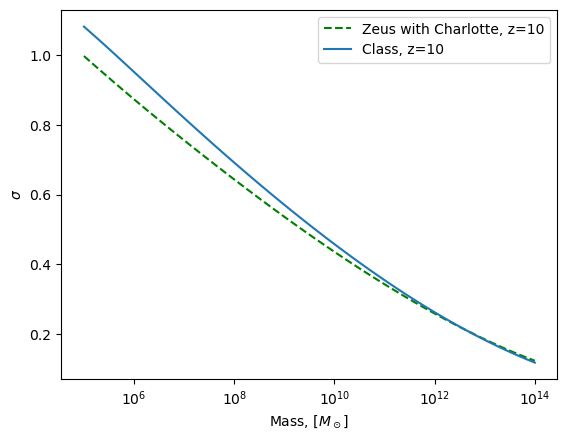

In [15]:
fig, ax = plt.subplots()



ax.plot(MM,hmfint_CDM.sigmatab[:,13]*0.93,'g--',label='Zeus with Charlotte, z=10' )
ax.plot(MM,hmfint_CDM.sigmaMhtab[:,13],'-',label='Class, z=10' ) 
plt.xscale('log')
#plt.yscale('log')

plt.legend()
#plt.xlim(1e7, 1e11)
#plt.ylim(0.25, 0.85)
plt.xlabel(r"Mass, $[M_\odot]$")
plt.ylabel(r"$\sigma$") 


In [16]:
eth_zeus.dsigmatab[:,13]

array([-2.37561405e-09, -2.45593993e-09, -2.53359011e-09, -2.60702230e-09,
       -2.67446586e-09, -2.73397182e-09, -2.78349432e-09, -2.82099591e-09,
       -2.84455986e-09, -2.85248682e-09, -2.84335368e-09, -2.81601813e-09,
       -2.76956046e-09, -2.70316809e-09, -2.61600012e-09, -2.50712089e-09,
       -2.37563329e-09, -2.22111786e-09, -2.04435847e-09, -1.84814819e-09,
       -1.63782607e-09, -1.42120511e-09, -1.20774351e-09, -1.00710953e-09,
       -8.27550806e-10, -6.74570060e-10, -5.50287061e-10, -4.53598805e-10,
       -3.80972398e-10, -3.27539989e-10, -2.88156696e-10, -2.58191638e-10,
       -2.33969390e-10, -2.12897190e-10, -1.93373450e-10, -1.74581709e-10,
       -1.56252852e-10, -1.38447870e-10, -1.21386385e-10, -1.05327056e-10,
       -9.04949336e-11, -7.70458010e-11, -6.50564197e-11, -5.45307373e-11,
       -4.54142131e-11, -3.76107497e-11, -3.09988115e-11, -2.54449508e-11,
       -2.08141096e-11, -1.69767769e-11, -1.38134489e-11, -1.12169773e-11,
       -9.09338702e-12, -

In [17]:
eth_zeus.dsigma2_dM(MM)

array([-2.65767382e-07, -2.74732992e-07, -2.83392122e-07, -2.91570275e-07,
       -2.99067020e-07, -3.05661578e-07, -3.11121965e-07, -3.15216839e-07,
       -3.17728190e-07, -3.18462355e-07, -3.17256876e-07, -3.13981403e-07,
       -3.08531719e-07, -3.00817568e-07, -2.90748533e-07, -2.78227914e-07,
       -2.63169048e-07, -2.45545371e-07, -2.25471178e-07, -2.03288990e-07,
       -1.79624122e-07, -1.55369398e-07, -1.31585867e-07, -1.09339347e-07,
       -8.95206707e-08, -7.27052500e-08, -5.90914957e-08, -4.85268638e-08,
       -4.06004733e-08, -3.47650404e-08, -3.04517519e-08, -2.71544352e-08,
       -2.44752978e-08, -2.21367745e-08, -1.99700659e-08, -1.78916363e-08,
       -1.58765819e-08, -1.39345100e-08, -1.20906599e-08, -1.03729195e-08,
       -8.80415787e-09, -7.39871788e-09, -6.16177978e-09, -5.09043820e-09,
       -4.17558673e-09, -3.40398590e-09, -2.76014159e-09, -2.22781571e-09,
       -1.79112329e-09, -1.43524813e-09, -1.14684604e-09, -9.14214255e-10,
       -7.27299998e-10, -

Text(0, 0.5, '$|d\\sigma/dM|$')

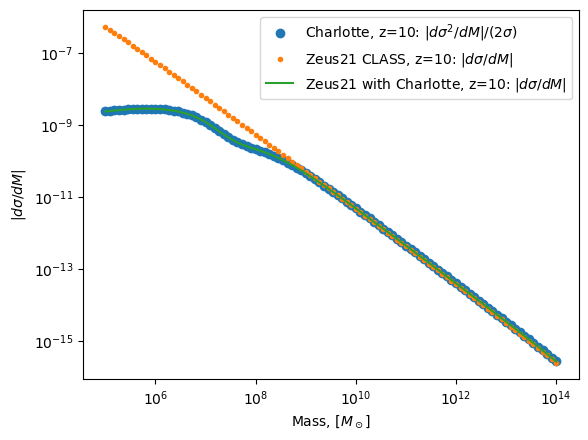

In [18]:
fig9, ax9 = plt.subplots()


#ax.plot(MM,dsigma2_10_eth,'-',label='Charlotte, z=10' ) 
ax9.plot(eth_zeus.Mhtab,-dsigma2_10_eth/2/sigma_eth,'o',label='Charlotte, z=10: $|d\sigma^2/dM|/(2\sigma)$')
ax9.plot(eth_zeus.Mhtab,-eth_zeus.dsigmadMMhtab[:,13],'.',label='Zeus21 CLASS, z=10: $|d\sigma/dM|$' ) 
ax9.plot(eth_zeus.Mhtab,-eth_zeus.dsigmatab[:,13],'-',label='Zeus21 with Charlotte, z=10: $|d\sigma/dM|$' ) 
plt.xscale('log')
plt.yscale('log')

plt.legend()
#plt.xlim(1e7, 1e11)
#plt.ylim(0.25, 0.85)
plt.xlabel(r"Mass, $[M_\odot]$")
plt.ylabel(r"$|d\sigma/dM|$")

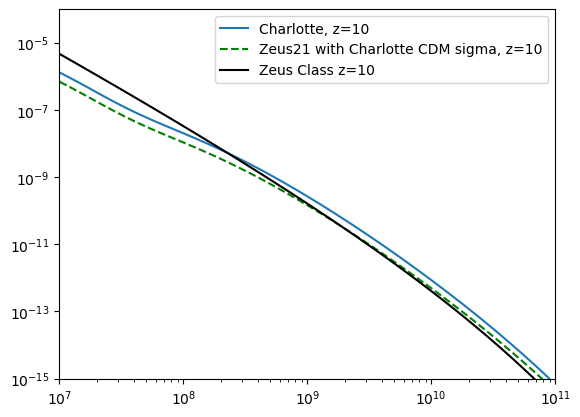

In [19]:
fig, ax = plt.subplots()

ax.plot(eth_zeus.Mhtab,(eth_bohr.dN_dlnM(eth_zeus.Mhtab, z=10, h_peak=0.4, k_peak=100., LCDM=False))/eth_zeus.Mhtab,'-',label='Charlotte, z=10' ) 
ax.loglog(eth_zeus.Mhtab,eth_zeus.HMFtab[:,13],'g--',label='Zeus21 with Charlotte CDM sigma, z=10')
ax.plot(eth_zeus.Mhtab,zeus21.ST_HMF(parcos,eth_zeus.Mhtab,eth_zeus.sigmaMhtab[:,13],eth_zeus.dsigmadMMhtab[:,13]),'k-',label='Zeus Class z=10')

plt.xlim(1e7, 1e11)
plt.ylim(1e-15,1e-4)
plt.legend()

(1e-20, 0.01)

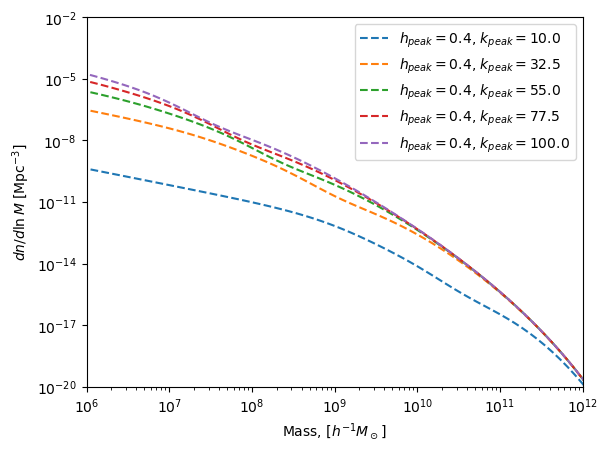

In [20]:

kpeak = np.linspace(10,100,5)
hpeak = [0.4,0.8]#[0.2,0.4,0.8]

fig, ax = plt.subplots()        
for j in range(0,len(kpeak)):
        


 
    hmfint_ethos = zeus21.HMF_interpolator(parcos,ClassyCosmo, LCDM=False, h_peak=hpeak[0], k_peak=kpeak[j])
    plt.loglog(MM, hmfint_ethos.HMFtab[:,13], 
      ls='dashed', label='$h_{peak}=$%s, $k_{peak}=$%s' % (hpeak[0],kpeak[j]))
    plt.legend()

plt.xlabel(r"Mass, $[h^{-1}M_\odot]$")
plt.ylabel(r"$dn/d\ln{M}$ [Mpc$^{-3}$]");

plt.xlim(1e6,1e12)
plt.ylim(1e-20,1e-2)

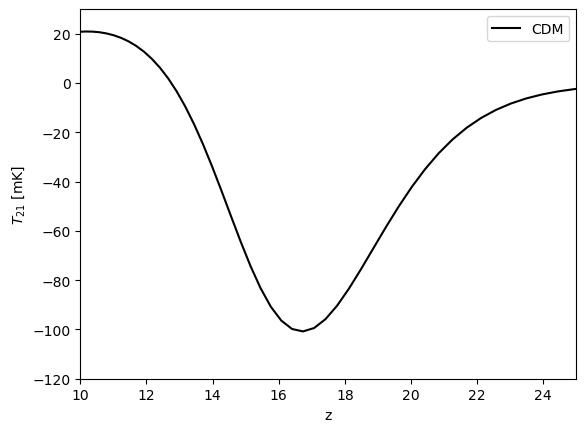

In [28]:
fig3, ax3 = plt.subplots()

ax3.plot(zlist,T21_coeff_CDM.T21avg, 'k',label='CDM')

plt.xlabel(r'z');
plt.ylabel(r'$T_{21}$ [mK]');
plt.xlim([10, 25])
plt.ylim([-120, 30])
ax3.legend()

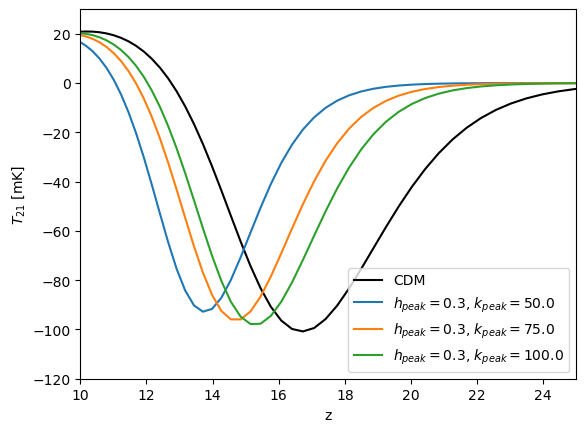

In [29]:

                            

kpeak = np.linspace(50,100,3)
hpeak = [0.3,0.8]#[0.2,0.4,0.8] 


for j in range(0,len(kpeak)):
        

    hmfint_ethos = zeus21.HMF_interpolator(parcos,ClassyCosmo, LCDM=False, h_peak=hpeak[0], k_peak=kpeak[j])
    T21_coeff_ethos = zeus21.get_T21_coefficients(parcos, ClassyCosmo, parastro, hmfint_ethos, zmin=8)
    powerspec21_ethos = zeus21.Power_Spectra(parcos, ClassCosmo, corrf, T21_coeff_ethos, RSD_MODE=1)
    zlist = T21_coeff_ethos.zintegral
    ax3.plot(zlist,T21_coeff_ethos.T21avg ,label='$h_{peak}=$%s, $k_{peak}=$%s' % (hpeak[0],kpeak[j]))
    ax3.legend()


fig3

In [23]:
#define all cosmology (including derived) parameters, and save them to the CosmoParams structure
CosmoParams = zeus21.Cosmo_Parameters(CosmoParams_input, ClassyCosmo) 
CorrFClass = zeus21.Correlations(CosmoParams, ClassyCosmo)
print('Correlation functions saved.')
HMFintclass = zeus21.HMF_interpolator(CosmoParams,ClassyCosmo)
print('HMF interpolator built. This ends the cosmology part -- moving to astrophysics.')

#set up your astro parameters too, here the peak of f*(Mh) as an example
epsilon_star = 0.15
AstroParams = zeus21.Astro_Parameters(CosmoParams, epsstar=epsilon_star)


ZMIN = 10.0 #down to which z we compute the evolution
CoeffStructure = zeus21.get_T21_coefficients(CosmoParams, ClassyCosmo, AstroParams, HMFintclass, zmin=ZMIN)
zlist = CoeffStructure.zintegral
print('SFRD and coefficients stored. Move ahead.')

Correlation functions saved.
HMF interpolator built. This ends the cosmology part -- moving to astrophysics.
SFRD and coefficients stored. Move ahead.


In [24]:
HMFintclass = zeus21.HMF_interpolator(CosmoParams,ClassyCosmo)